In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')


***Sadece ilk başta kullandığım kütüphaneleri öncelikle ekliyorum daha sonra ihtiyacım oldukça diğer kütüphaneleride import edeceğim o cell de***

In [2]:
dataset = pd.read_csv('datasets/dataset.csv')
df = dataset.copy()
df.head()

,Fiyat,Adres,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Türü,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı
0,"2,250,000TL",Adana - Aladağ - Ceritler Mahallesi,3+1,Belirtilmemiş,Isıtma Yok,Krediye Uygun,Belirtilmemiş,Belirtilmemiş,Boş,Hayır,Konut,Müstakil Ev,135 M2,0 (Yeni),2,Boş,Belirtilmemiş,2,1,Belirtilmemiş
1,"2,500,000TL",Adana - Aladağ - Ceritler Mahallesi,4+2,Belirtilmemiş,Sobalı,Bilinmiyor,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Müstakil Ev,300 M2,16-20,2,Boş,Belirtilmemiş,2,Belirtilmemiş,Belirtilmemiş
2,"900,000TL",Adana - Aladağ - Ceritler Mahallesi,1 Oda,Belirtilmemiş,Sobalı,Bilinmiyor,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Müstakil Ev,725 M2,21 Ve Üzeri,1,Boş,Belirtilmemiş,1,Belirtilmemiş,Belirtilmemiş
3,"1,240,000TL",Adana - Ceyhan - Namık Kemal Mahallesi,2+1,5.Kat,Isıtma Yok,Krediye Uygun,İkinci El,Kat Mülkiyeti,Boş,Hayır,Konut,Daire,87 M2,21 Ve Üzeri,5,Kiracı Oturuyor,Bilinmiyor,1,Belirtilmemiş,Belirtilmemiş
4,"4,800,000TL",Adana - Ceyhan - Şahin Özbilen Mahallesi,2+1,Yüksek Giriş,Klimalı,Krediye Uygun,Belirtilmemiş,Belirtilmemiş,Belirtilmemiş,Hayır,Konut,Daire,120 M2,15-Nov,1,Kiracı Oturuyor,Belirtilmemiş,1,Belirtilmemiş,Belirtilmemiş


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154802 entries, 0 to 154801
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Fiyat               154802 non-null  object
 1   Adres               154802 non-null  object
 2   Oda Sayısı          154802 non-null  object
 3   Bulunduğu Kat       154802 non-null  object
 4   Isıtma Tipi         154802 non-null  object
 5   Krediye Uygunluk    154802 non-null  object
 6   Yapı Durumu         154802 non-null  object
 7   Tapu Durumu         154802 non-null  object
 8   Eşya Durumu         154802 non-null  object
 9   Site İçerisinde     154802 non-null  object
 10  Türü                154802 non-null  object
 11  Tipi                154802 non-null  object
 12  Brüt Metrekare      154802 non-null  object
 13  Binanın Yaşı        154802 non-null  object
 14  Binanın Kat Sayısı  154802 non-null  int64 
 15  Kullanım Durumu     154802 non-null  object
 16  Ya

In [4]:
df.describe()

,Binanın Kat Sayısı,Banyo Sayısı
count,154802.000000,154802.000000
mean,5.404349,1.533133
std,4.226302,0.742899
min,1.000000,1.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,6.000000,2.000000
max,99.000000,5.000000


Burada kat sayısı 99 olan ayrıca incelenmesi gerekir çünkü aykırı bir değerdir yada veri setinden direkt çıkarılabilir eğer bizim için o tür evlerin önemi yok ise

In [5]:
df.describe(include='O').T

,count,unique,top,freq
Fiyat,154802,11250,"2,500,000TL",1726
Adres,154802,9104,Balıkesir - Edremit - Akçay Mahallesi,2265
Oda Sayısı,154802,35,3+1,61220
Bulunduğu Kat,154802,54,2.Kat,25745
Isıtma Tipi,154802,21,Kombi Doğalgaz,91529
Krediye Uygunluk,154802,3,Krediye Uygun,132655
Yapı Durumu,154802,4,Belirtilmemiş,92454
Tapu Durumu,154802,7,Belirtilmemiş,92660
Eşya Durumu,154802,3,Boş,91050
Site İçerisinde,154802,2,Hayır,129064


Burada ise genel olarak yapılabilecek birkaç yorum var:
- Satılık evlerin büyük çoğunluğu bir site içerisinde bulunmuyor. 
- Ayrıca sütünlardaki tür sütünü sadece tek değer alıyor bu enden o sütünü veri setinden direkt olarak silebiliriz. 
- Ayrıca tapu durumu,yapı durumu,balkon sayısı ve wc sayısı gibi sütünlarda çoğunluk olarak belirtilmemiş ifadesi bulunuyor yani bize bir bilgi vermiyor bu nedenle modelin performansına etkisine  bakarak bu sütünlar çıkarılabilir                                              
**Genel olarak bütün sütünlara az da olsa yorum yapılabilir ve veri setini biraz daha iyi anlayabiliriz**

In [6]:
df.isnull().sum()

Fiyat                 0
Adres                 0
Oda Sayısı            0
Bulunduğu Kat         0
Isıtma Tipi           0
Krediye Uygunluk      0
Yapı Durumu           0
Tapu Durumu           0
Eşya Durumu           0
Site İçerisinde       0
Türü                  0
Tipi                  0
Brüt Metrekare        0
Binanın Yaşı          0
Binanın Kat Sayısı    0
Kullanım Durumu       0
Yatırıma Uygunluk     0
Banyo Sayısı          0
Balkon Sayısı         0
WC Sayısı             0
dtype: int64

Null satırımız bulunmuyor yani eksik değer yok

In [7]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

4080


***Çift yani birbirinin aynısı olan satır var mı var ise onları siliyoruz***

In [8]:
df.describe(include='O').T

,count,unique,top,freq
Fiyat,150722,11250,"2,500,000TL",1670
Adres,150722,9104,Balıkesir - Edremit - Akçay Mahallesi,1468
Oda Sayısı,150722,35,3+1,59893
Bulunduğu Kat,150722,54,2.Kat,24863
Isıtma Tipi,150722,21,Kombi Doğalgaz,89440
Krediye Uygunluk,150722,3,Krediye Uygun,128774
Yapı Durumu,150722,4,Belirtilmemiş,91012
Tapu Durumu,150722,7,Belirtilmemiş,91117
Eşya Durumu,150722,3,Boş,88358
Site İçerisinde,150722,2,Hayır,125457


In [9]:
df.drop(columns=['Türü','Krediye Uygunluk','Balkon Sayısı','WC Sayısı','Yapı Durumu','Tapu Durumu'],axis=1,inplace=True)

***Yukarıda dediğim gibi Türü sütünü tek bir değişkene sahip bu nedenle bize bir bilgi vermiyor*** 

In [10]:
df['İl'] = df['Adres'].apply(lambda x: x.split('-')[0])
df['İlçe'] = df['Adres'].apply(lambda x: x.split('-')[1])
df['Mahalle'] = df['Adres'].apply(lambda x: x.split('-')[2])

df.drop('Adres',axis=1,inplace=True)


***Bu kısımda adres ksımını bizim modelimize daha iyi bir katkı sağlaması için il ilçe mahalle şekilnde ayırıyorum istanbuldaki bir ev daha pahalı olurken kastomonudaki bir ev daha ucuz olması gibi düşünebilirsiniz***

In [ ]:
import json

location_map = {}

for _, row in df.iterrows():
    il = row['İl']
    ilce = row['İlçe']
    mahalle = row['Mahalle']
    
    if il not in location_map:
        location_map[il] = {}
    if ilce not in location_map[il]:
        location_map[il][ilce] = []
    if mahalle not in location_map[il][ilce]:
        location_map[il][ilce].append(mahalle)

with open('location_map.json', 'w', encoding='utf-8') as f:
    json.dump(location_map, f, ensure_ascii=False, indent=2)

In [12]:
df['Oda Sayısı'].replace('9+ Oda','15',inplace=True)
df['Oda Sayısı'] = df['Oda Sayısı'].apply(lambda x :x if 'Oda' not in x else x.replace('Oda',''))


df['Oda Sayısı'] = df['Oda Sayısı'].apply(lambda x: str(float(x.split('+')[0])+float(x.split('+')[1])) if '+' in x else x)

df['Oda Sayısı'].replace('Stüdyo','0',inplace=True)

df['Oda Sayısı'] = df['Oda Sayısı'].astype(float)

print(df['Oda Sayısı'].unique())

[ 4.   6.   1.   3.   8.   5.   7.   9.   2.   3.5  4.5 10.  11.  15.
  5.5  2.5  0.  12. ]


In [13]:
vc_isitma = df['Isıtma Tipi'].value_counts()
other = vc_isitma[vc_isitma<200]
df['Isıtma Tipi'] = df['Isıtma Tipi'].apply(lambda x: 'Other' if x in other else x)

In [14]:
df['Isıtma Tipi'].unique()

array(['Isıtma Yok', 'Sobalı', 'Klimalı', 'Kombi Doğalgaz',
       'Doğalgaz Sobalı', 'Merkezi Doğalgaz', 'Güneş Enerjisi',
       'Merkezi (Pay Ölçer)', 'Other', 'Yerden Isıtma', 'Merkezi Kömür',
       'Şömine', 'Jeotermal', 'Kat Kaloriferi', 'Isı Pompası'],
      dtype=object)

In [15]:
df['Isıtma Tipi'].replace({
    'Isıtma Yok':'0',
    'Other':'4',
    'Sobalı':'1',
    'Klimalı':'3',
    'Kombi Doğalgaz':'5',
    'Doğalgaz Sobalı':'4',
    'Merkezi (Pay Ölçer)':'6',
    'Merkezi Doğalgaz':'6',
    'Güneş Enerjisi':'9',
    'Yerden Isıtma':'7',
    'Merkezi Kömür':'8',
    'Şömine':'2',
    'Jeotermal':'10',
    'Kat Kaloriferi':'11',
    'Isı Pompası':'12'},inplace=True)

df['Isıtma Tipi'] = df['Isıtma Tipi'].astype(float)
df['Isıtma Tipi'].unique()

array([ 0.,  1.,  3.,  5.,  4.,  6.,  9.,  7.,  8.,  2., 10., 11., 12.])

In [16]:
df['Site İçerisinde'].replace({'Evet':'1','Hayır':'0'},inplace=True)
df['Site İçerisinde'] = df['Site İçerisinde'].astype('int8')


In [17]:
df['Tipi'].replace({
    'Daire':'3',
    'Residence':'5',
    'Villa':'8',
    'Müstakil Ev':'6',
    'Yazlık':'4',
    'Bina':'3',
    'Köy Evi':'1',
    'Çiftlik Evi':'2',
    'Devremülk':'5',
    'Yalı Dairesi':'7',
    'Köşk':'9',
    'Prefabrik':'1',
    'Yalı':'12',
    'Dağ Evi':'4',
    'Kooperatif':'3',
},inplace=True)

df['Tipi'] = df['Tipi'].astype(float)
df['Tipi'].unique()


array([ 6.,  3.,  8.,  1.,  2.,  4.,  5.,  9.,  7., 12.])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150722 entries, 0 to 154801
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fiyat               150722 non-null  object 
 1   Oda Sayısı          150722 non-null  float64
 2   Bulunduğu Kat       150722 non-null  object 
 3   Isıtma Tipi         150722 non-null  float64
 4   Eşya Durumu         150722 non-null  object 
 5   Site İçerisinde     150722 non-null  int8   
 6   Tipi                150722 non-null  float64
 7   Brüt Metrekare      150722 non-null  object 
 8   Binanın Yaşı        150722 non-null  object 
 9   Binanın Kat Sayısı  150722 non-null  int64  
 10  Kullanım Durumu     150722 non-null  object 
 11  Yatırıma Uygunluk   150722 non-null  object 
 12  Banyo Sayısı        150722 non-null  int64  
 13  İl                  150722 non-null  object 
 14  İlçe                150722 non-null  object 
 15  Mahalle             150722 non-null  ob

In [19]:
df['Brüt Metrekare'] = df['Brüt Metrekare'].apply(lambda x: x.replace(' M2','').replace('.','').replace(' m2','')).astype('float64')


In [20]:
df['Binanın Yaşı'].replace('10-May','0',inplace=True)
df['Binanın Yaşı'].replace('15-Nov','0',inplace=True)
df['Binanın Yaşı'].replace('16-20','18',inplace=True)

df['Binanın Yaşı'] = df['Binanın Yaşı'].apply(lambda x: x.split(' ')[0] if ' ' in x else x)
df['Binanın Yaşı'] = df['Binanın Yaşı'].astype('int8')




In [21]:
df['Yatırıma Uygunluk'].replace({'Yatırıma Uygun':'10','Yatırıma Uygun Değil':'0', 'Bilinmiyor':'1','Belirtilmemiş':'1'},inplace=True)
df['Yatırıma Uygunluk'] = df['Yatırıma Uygunluk'].astype('int8')
df['Yatırıma Uygunluk'].unique()


array([ 1, 10,  0], dtype=int8)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150722 entries, 0 to 154801
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fiyat               150722 non-null  object 
 1   Oda Sayısı          150722 non-null  float64
 2   Bulunduğu Kat       150722 non-null  object 
 3   Isıtma Tipi         150722 non-null  float64
 4   Eşya Durumu         150722 non-null  object 
 5   Site İçerisinde     150722 non-null  int8   
 6   Tipi                150722 non-null  float64
 7   Brüt Metrekare      150722 non-null  float64
 8   Binanın Yaşı        150722 non-null  int8   
 9   Binanın Kat Sayısı  150722 non-null  int64  
 10  Kullanım Durumu     150722 non-null  object 
 11  Yatırıma Uygunluk   150722 non-null  int8   
 12  Banyo Sayısı        150722 non-null  int64  
 13  İl                  150722 non-null  object 
 14  İlçe                150722 non-null  object 
 15  Mahalle             150722 non-null  ob

In [23]:
df[df['Fiyat'].str.contains('arrow_downward')]

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Eşya Durumu,Site İçerisinde,Tipi,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,İl,İlçe,Mahalle
9,"830,000TLarrow_downward%5",3.0,Belirtilmemiş,1.0,Boş,0,6.0,243.0,21,2,Kiracı Oturuyor,10,1,Adana,Ceyhan,Gazi Osman Paşa Mahallesi
17,"2,550,000TLarrow_downward%4",4.0,4.Kat,5.0,Belirtilmemiş,0,3.0,140.0,0,5,Mülk Sahibi Oturuyor,1,2,Adana,Ceyhan,Gazi Osman Paşa Mahallesi
31,"1,750,000TLarrow_downward%10",4.0,1.Kat,6.0,Belirtilmemiş,1,3.0,145.0,0,7,Kiracı Oturuyor,1,2,Adana,Ceyhan,İstiklal Mahallesi
51,"2,750,000TLarrow_downward%8",3.0,2.Kat,1.0,Belirtilmemiş,0,3.0,1015.0,2,2,Boş,1,1,Adana,Ceyhan,Küçükburhaniye Mahallesi
52,"4,150,000TLarrow_downward%8",4.0,Belirtilmemiş,5.0,Boş,0,6.0,254.0,18,2,Mülk Sahibi Oturuyor,1,1,Adana,Ceyhan,Namık Kemal Mahallesi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154742,"8,350,000TLarrow_downward%2",6.0,Belirtilmemiş,5.0,Boş,1,8.0,250.0,18,4,Mülk Sahibi Oturuyor,10,2,Sakarya,Serdivan,Beşköprü Mahallesi
154743,"3,300,000TLarrow_downward%3",4.0,Belirtilmemiş,5.0,Belirtilmemiş,0,8.0,212.0,0,2,Kiracı Oturuyor,1,1,Sakarya,Serdivan,Hamitabat Mahallesi
154761,"7,150,000TLarrow_downward%90",5.0,2.Kat,7.0,Boş,0,3.0,308.0,0,4,Boş,1,2,Sakarya,Serdivan,İstiklal Mahallesi
154789,"5,500,000TLarrow_downward%12",5.0,Bahçe Dublex,3.0,Eşyalı,0,3.0,320.0,0,2,Boş,10,1,Sakarya,Söğütlü,Cami Cedit Mahallesi


In [24]:
df['Fiyat'] = df['Fiyat'].apply(lambda x: x.split('TL')[0] if 'arrow_downward' in x else x)
df['Fiyat'] = df['Fiyat'].apply(lambda x: x.replace('TL','').replace(',','').replace(' ',''))

df['Fiyat'] = df['Fiyat'].astype('int64')

In [25]:
df.describe(include='O').T

,count,unique,top,freq
Bulunduğu Kat,150722,54,2.Kat,24863
Eşya Durumu,150722,3,Boş,88358
Kullanım Durumu,150722,3,Boş,88924
İl,150722,80,İstanbul,30626
İlçe,150722,650,Edremit,5346
Mahalle,150722,5480,Cumhuriyet Mahallesi,3603


In [26]:
df.nunique()

Fiyat                 4020
Oda Sayısı              18
Bulunduğu Kat           54
Isıtma Tipi             13
Eşya Durumu              3
Site İçerisinde          2
Tipi                    10
Brüt Metrekare        1267
Binanın Yaşı             7
Binanın Kat Sayısı      60
Kullanım Durumu          3
Yatırıma Uygunluk        3
Banyo Sayısı             5
İl                      80
İlçe                   650
Mahalle               5480
dtype: int64

In [27]:
df['Eşya Durumu'].replace('Belirtilmemiş','Boşluk',inplace=True)
df['Kullanım Durumu'].replace('Boş','Boşluk2',inplace=True)

In [28]:
df['Site İçerisinde'] = pd.get_dummies(df['Site İçerisinde'],drop_first=True)
df = df.join(pd.get_dummies(df['Eşya Durumu'],drop_first=True))
df = df.join(pd.get_dummies(df['Kullanım Durumu'],drop_first=True))


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150722 entries, 0 to 154801
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Fiyat                 150722 non-null  int64  
 1   Oda Sayısı            150722 non-null  float64
 2   Bulunduğu Kat         150722 non-null  int32  
 3   Isıtma Tipi           150722 non-null  float64
 4   Eşya Durumu           150722 non-null  int32  
 5   Site İçerisinde       150722 non-null  bool   
 6   Tipi                  150722 non-null  float64
 7   Brüt Metrekare        150722 non-null  float64
 8   Binanın Yaşı          150722 non-null  int8   
 9   Binanın Kat Sayısı    150722 non-null  int64  
 10  Kullanım Durumu       150722 non-null  int32  
 11  Yatırıma Uygunluk     150722 non-null  int8   
 12  Banyo Sayısı          150722 non-null  int64  
 13  İl                    150722 non-null  int32  
 14  İlçe                  150722 non-null  int32  
 15  Mahal

In [30]:
Q1 = df['Fiyat'].quantile(0.25)
Q3 = df['Fiyat'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Fiyat'] > lower_bound) & (df['Fiyat'] < upper_bound)]
df.shape


(134991, 20)

In [31]:
Q1 = df['Brüt Metrekare'].quantile(0.25)
Q3 = df['Brüt Metrekare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Brüt Metrekare'] > lower_bound) & (df['Brüt Metrekare'] < upper_bound)]
df.shape


(127693, 20)

In [32]:
Q1 = df['Oda Sayısı'].quantile(0.25)
Q3 = df['Oda Sayısı'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df = df[(df['Oda Sayısı'] > lower_bound) & (df['Oda Sayısı'] < upper_bound)]
df.shape


(123927, 20)

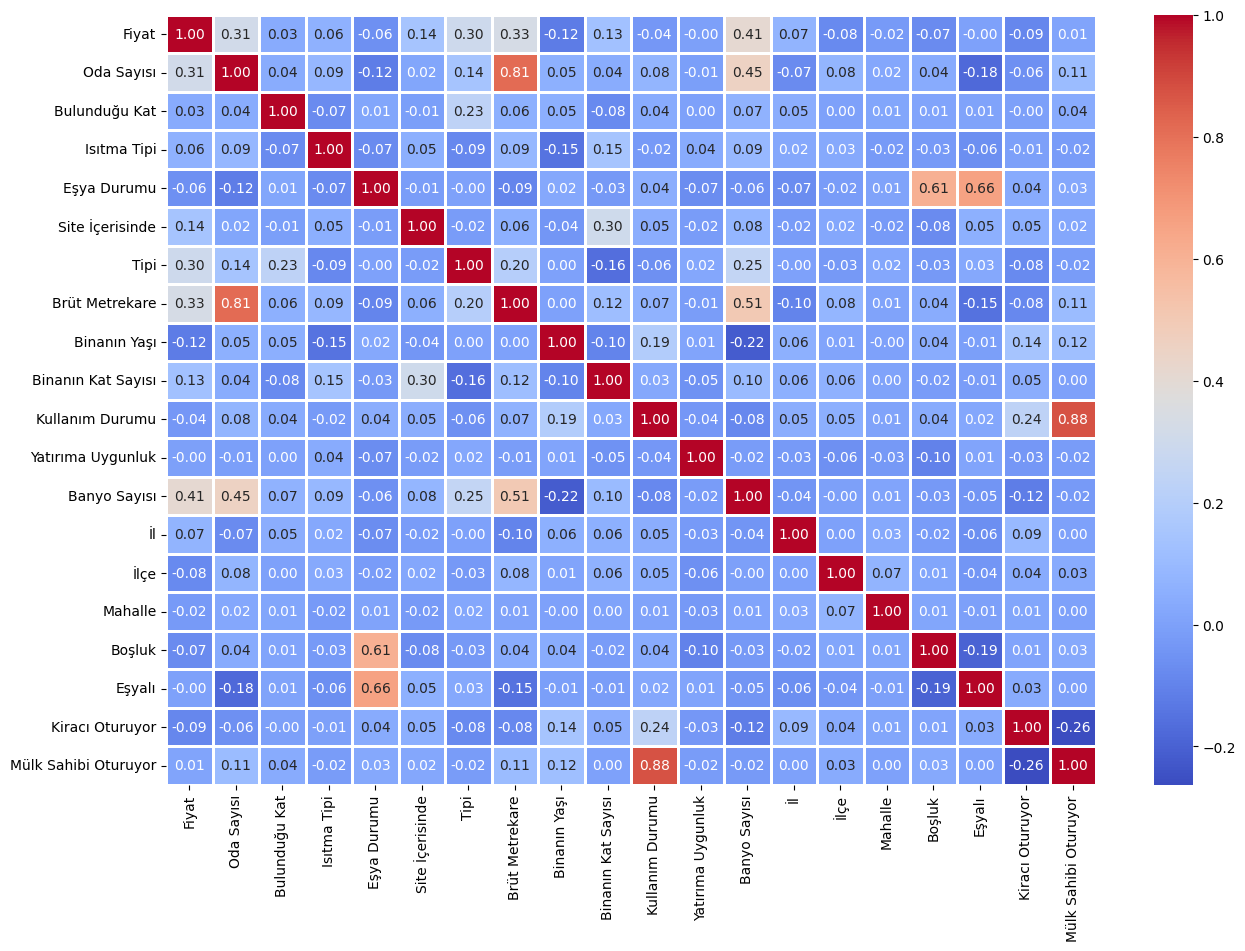

In [33]:
conn = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(conn,annot=True,cmap='coolwarm',fmt='.2f',linewidths=2)
plt.show()



In [34]:
df.to_csv('datasets/cleaned_dataset.csv',index=False)

In [35]:
df.corr()['Fiyat'].sort_values(ascending=False,key=abs)

Fiyat                   1.000000
Banyo Sayısı            0.408701
Brüt Metrekare          0.333214
Oda Sayısı              0.312463
Tipi                    0.298853
Site İçerisinde         0.142039
Binanın Kat Sayısı      0.129177
Binanın Yaşı           -0.123822
Kiracı Oturuyor        -0.087919
İlçe                   -0.077759
Boşluk                 -0.073644
İl                      0.071550
Isıtma Tipi             0.060723
Eşya Durumu            -0.056637
Kullanım Durumu        -0.035233
Bulunduğu Kat           0.033089
Mahalle                -0.023811
Mülk Sahibi Oturuyor    0.008659
Yatırıma Uygunluk      -0.003195
Eşyalı                 -0.000131
Name: Fiyat, dtype: float64

In [36]:
drop_c = df.corr()['Fiyat'].sort_values(ascending=False,key=abs)[-4:-1].index
df.drop(drop_c,axis=1,inplace=True)


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('Fiyat',axis=1)
y = df['Fiyat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)


In [42]:
#!pip install pycaret

from pycaret.regression import *

reg = setup(data=df,target='Fiyat',train_size=0.85)
best = compare_models()


--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\Python310\lib\logging\__init__.py", line 1101, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\Python310\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u0131' in position 212: character maps to <undefined>
Call stack:
  File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Yauxej\Documents\konut_oneri\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\Yauxej\Documents\konut_oneri\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Yaux

,Description,Value
0,Session id,1676
1,Target,Fiyat
2,Target type,Regression
3,Original data shape,"(123927, 17)"
4,Transformed data shape,"(123927, 17)"
5,Transformed train set shape,"(105337, 17)"
6,Transformed test set shape,"(18590, 17)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,558668.6084,673105043611.5604,820407.4176,0.6747,0.3071,0.2656,5.3390
lightgbm,Light Gradient Boosting Machine,600882.8610,722160657285.9113,849759.7456,0.6510,0.3261,0.2954,0.2780
et,Extra Trees Regressor,586865.8875,734926311661.6962,857241.9176,0.6448,0.3202,0.2806,5.1850
knn,K Neighbors Regressor,675863.2396,977366593340.9941,988580.0509,0.5277,0.3658,0.3227,0.6970
gbr,Gradient Boosting Regressor,721645.8693,1004289671181.3860,1002091.0111,0.5147,0.3816,0.3677,1.4430
dt,Decision Tree Regressor,741142.5049,1284183665789.5232,1133164.8699,0.3793,0.4096,0.3317,0.1300
ridge,Ridge Regression,904935.4656,1490873419114.9285,1220943.3269,0.2796,0.4613,0.4662,0.0420
llar,Lasso Least Angle Regression,904935.2340,1490873432191.4106,1220943.3325,0.2796,0.4613,0.4662,0.0430
br,Bayesian Ridge,904945.9424,1490873471951.8569,1220943.3408,0.2796,0.4613,0.4662,0.0630
lasso,Lasso Regression,904935.2340,1490873432156.4131,1220943.3325,0.2796,0.4613,0.4662,0.2360


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred,squared=False))



816833.914584172


In [39]:
y_pred, y_test

(array([3822161.66666667, 2695050.        ,  185500.        , ...,
        3583870.        , 1978156.67261905, 2209790.        ]),
 108828    4500000
 74765     2500000
 112811      42000
 73456     1700000
 139308    1950000
            ...   
 89682     1330000
 114383    1330000
 114283     700000
 9329      1699000
 13504     2525000
 Name: Fiyat, Length: 24786, dtype: int64)

In [57]:
import joblib

joblib.dump(rf, "./random_forest.joblib")

['./random_forest.joblib']

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123927 entries, 0 to 154801
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fiyat               123927 non-null  int64  
 1   Oda Sayısı          123927 non-null  float64
 2   Bulunduğu Kat       123927 non-null  int32  
 3   Isıtma Tipi         123927 non-null  float64
 4   Eşya Durumu         123927 non-null  int32  
 5   Site İçerisinde     123927 non-null  bool   
 6   Tipi                123927 non-null  float64
 7   Brüt Metrekare      123927 non-null  float64
 8   Binanın Yaşı        123927 non-null  int8   
 9   Binanın Kat Sayısı  123927 non-null  int64  
 10  Kullanım Durumu     123927 non-null  int32  
 11  Banyo Sayısı        123927 non-null  int64  
 12  İl                  123927 non-null  int32  
 13  İlçe                123927 non-null  int32  
 14  Boşluk              123927 non-null  bool   
 15  Eşyalı              123927 non-null  bo

<Axes: xlabel='None', ylabel='None'>

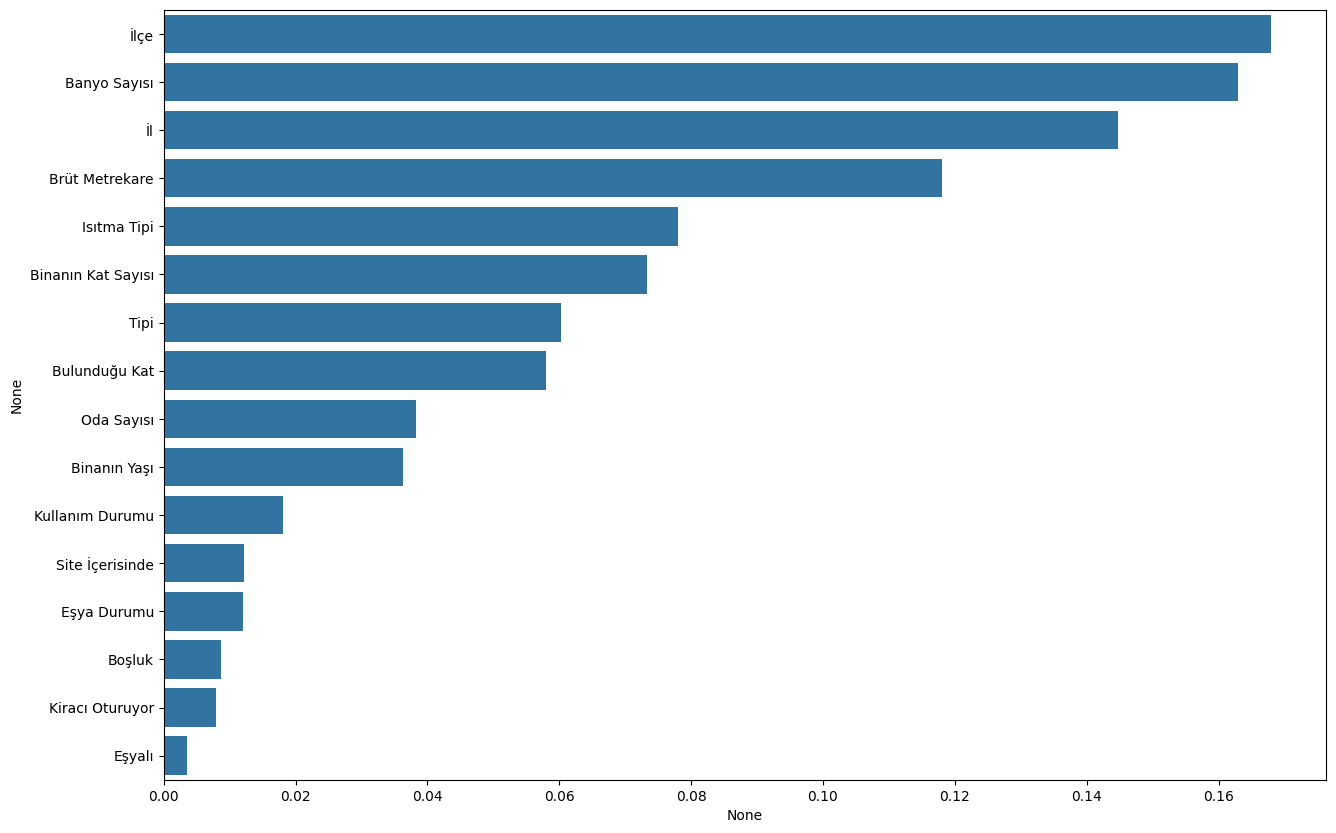

In [40]:
plt.figure(figsize=(15,10))
fe = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=fe,y=fe.index)




In [54]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def create_sample_weights(X, feature_weights):

    weights = np.ones(X.shape[0])
    
    for feature, weight in feature_weights.items():  # iteritems() -> items()
        if feature in X.columns:
            weights *= (1 + weight * np.abs(X[feature]))
    
    return weights


rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Özellik ağırlıkları
feature_weights = {
    'Oda Sayısı': 2.0,      
    'İlçe': 0.2,           
    'Banyo Sayısı': 0.1,
    'Brüt Metrekare': 2.0,
    'Binanın Kat Sayısı': 0.1,
    'Binanın Yaşı': 0.2,
    'Isıtma Tipi': 0.1,
}

# Sample weights oluştur ve modeli eğit
sample_weights = create_sample_weights(X_train, feature_weights)
rf_model.fit(X_train, y_train, sample_weight=sample_weights)

# Model performansını değerlendir
y_pred = rf_model.predict(X_test)
print("\nModel Performansı:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Özellik önemliliklerini göster
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
print("\nÖzellik Önemlilikleri:")
print(feature_importance.sort_values('importance', ascending=False))

# Modeli kaydet
joblib.dump(rf_model, 'random_forest.joblib')


Model Performansı:
R2 Score: 0.6822
MAE: 551587.48
RMSE: 809237.11

Özellik Önemlilikleri:
               feature  importance
10        Banyo Sayısı    0.171118
11                  İl    0.169641
12                İlçe    0.140789
6       Brüt Metrekare    0.128698
8   Binanın Kat Sayısı    0.083018
2          Isıtma Tipi    0.065798
1        Bulunduğu Kat    0.058570
5                 Tipi    0.050542
7         Binanın Yaşı    0.041273
0           Oda Sayısı    0.027907
9      Kullanım Durumu    0.018916
4      Site İçerisinde    0.012576
3          Eşya Durumu    0.011007
15     Kiracı Oturuyor    0.008720
13              Boşluk    0.007886
14              Eşyalı    0.003540


['random_forest.joblib']